#  Clasificación Multiclase

## Importa las librerías necesarias


Importamos las librerías necesarias para el procesamiento de datos, entrenamiento del modelo y evaluación del mismo.


In [ ]:
# Importación de librerías para manipulación de datos y visualización
import pandas as pd  # Para trabajar con estructuras de datos tipo tabla (DataFrames)
import numpy as np  # Para operaciones matemáticas y matrices
import matplotlib.pyplot as plt  # Para crear gráficos básicos
import seaborn as sns  # Para gráficos estadísticos más atractivos

# Importación de herramientas de Scikit-learn para preprocesamiento y modelado
from sklearn.model_selection import train_test_split  # Para dividir los datos en entrenamiento y prueba
from sklearn.preprocessing import OneHotEncoder, StandardScaler  # Para codificar variables categóricas y escalar variables numéricas

# Algoritmo de clasificación
from sklearn.linear_model import LogisticRegression  # Regresión logística para clasificación binaria o multiclase


# Estrategia para convertir clasificadores binarios en multiclase
from sklearn.multiclass import OneVsOneClassifier  # Permite usar clasificadores binarios para problemas multiclase

# Métrica para evaluar el rendimiento del modelo
from sklearn.metrics import accuracy_score  # Calcula el porcentaje de predicciones correctas
# Opcional: ocultar advertencias para mantener la salida limpia
import warnings
warnings.filterwarnings('ignore')  # Ignora advertencias (útil en notebooks, pero usar con precaución)

## Sobre el conjunto de datos
El conjunto de datos utilizado en este laboratorio es el conjunto de datos "Predicción del Riesgo de Obesidad", disponible públicamente en la biblioteca UCI bajo la licencia CCA 4.0. Este conjunto de datos contiene 17 atributos en total y 2,111 muestras.

A continuación se describen los atributos del conjunto de datos.


<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-7zrl{text-align:left;vertical-align:bottom}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-7zrl">Nombre de Variable</th>
    <th class="tg-7zrl">Tipo</th>
    <th class="tg-7zrl">Descripción</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-7zrl">Gender</td>
    <td class="tg-7zrl">Categórica</td>
    <td class="tg-7zrl">Género del individuo (masculino o femenino)</td>
  </tr>
  <tr>
    <td class="tg-7zrl">Age</td>
    <td class="tg-7zrl">Continua</td>
    <td class="tg-7zrl">Edad del individuo en años</td>
  </tr>
  <tr>
    <td class="tg-7zrl">Height</td>
    <td class="tg-7zrl">Continua</td>
    <td class="tg-7zrl">Estatura del individuo en metros</td>
  </tr>
  <tr>
    <td class="tg-7zrl">Weight</td>
    <td class="tg-7zrl">Continua</td>
    <td class="tg-7zrl">Peso del individuo en kilogramos</td>
  </tr>
  <tr>
    <td class="tg-7zrl">family_history_with_overweight</td>
    <td class="tg-7zrl">Binaria</td>
    <td class="tg-7zrl">¿Algún miembro de la familia ha sufrido o sufre de sobrepeso?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">FAVC</td>
    <td class="tg-7zrl">Binaria</td>
    <td class="tg-7zrl">¿Consumes alimentos con alto contenido calórico con frecuencia?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">FCVC</td>
    <td class="tg-7zrl">Entera</td>
    <td class="tg-7zrl">¿Sueles comer verduras en tus comidas?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">NCP</td>
    <td class="tg-7zrl">Continua</td>
    <td class="tg-7zrl">¿Cuántas comidas principales haces al día?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">CAEC</td>
    <td class="tg-7zrl">Categórica</td>
    <td class="tg-7zrl">¿Comes algo entre comidas?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">SMOKE</td>
    <td class="tg-7zrl">Binaria</td>
    <td class="tg-7zrl">¿Fumas?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">CH2O</td>
    <td class="tg-7zrl">Continua</td>
    <td class="tg-7zrl">¿Cuánta agua bebes diariamente?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">SCC</td>
    <td class="tg-7zrl">Binaria</td>
    <td class="tg-7zrl">¿Monitorea las calorías que consume diariamente?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">FAF</td>
    <td class="tg-7zrl">Continua</td>
    <td class="tg-7zrl">¿Con qué frecuencia realizas actividad física?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">TUE</td>
    <td class="tg-7zrl">Entera</td>
    <td class="tg-7zrl">¿Cuánto tiempo usas dispositivos tecnológicos como celular, videojuegos, etc.?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">CALC</td>
    <td class="tg-7zrl">Categórica</td>
    <td class="tg-7zrl">¿Con qué frecuencia consumes alcohol?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">MTRANS</td>
    <td class="tg-7zrl">Categórica</td>
    <td class="tg-7zrl">¿Qué medio de transporte usas habitualmente?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">NObeyesdad</td>
    <td class="tg-7zrl">Categórica</td>
    <td class="tg-7zrl">Nivel de obesidad</td>
  </tr>
</tbody></table>




### Cargamos el dataset


In [ ]:
# Ruta del archivo CSV alojado en la nube (UCI dataset sobre niveles de obesidad)
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/GkDzb7bWrtvGXdPOfk6CIg/Obesity-level-prediction-dataset.csv"

# Carga el archivo CSV desde la URL en un DataFrame de pandas
data = pd.read_csv(file_path)

# Muestra las primeras 5 filas del conjunto de datos para tener una vista preliminar
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Análisis de datos exploratorio



Gráfico de la distribución de la variable objetivo para entender cómo se distribuyen las clases.

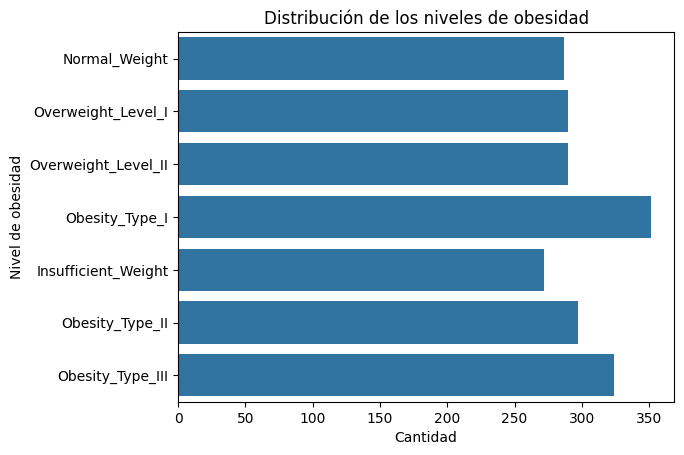

In [ ]:

# Visualización de la distribución de la variable objetivo (nivel de obesidad)
sns.countplot(y='NObeyesdad', data=data)  # Crea un gráfico de barras que cuenta cuántas veces aparece cada categoría de obesidad

# Añade un título al gráfico y etiquetas a los ejes
plt.title('Distribución de los niveles de obesidad')  # Título del gráfico: "Distribución de los niveles de obesidad"
plt.xlabel('Cantidad')  # Etiqueta para el eje x: "Cantidad"
plt.ylabel('Nivel de obesidad')  # Etiqueta para el eje y: "Nivel de obesidad"

# Muestra el gráfico en pantalla
plt.show()  # Renderiza el gráfico para que se vea en la salida


Esto muestra que el conjunto de datos está bastante equilibrado y no requiere atención especial en términos de entrenamiento sesgado.


### Limpieza de datos
Verifica si hay valores nulos y muestra un resumen del conjunto de datos (usa los métodos .info() y .describe()).

In [ ]:
# Muestra información general del conjunto de datos:
# Incluye el número de entradas, columnas, tipos de datos y si hay valores nulos
print(data.info())

# Muestra estadísticas descriptivas de las columnas numéricas:
# Incluye media, desviación estándar, valores mínimos, máximos y percentiles
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Con info sabemos:

- Los valores nulos son cero en todas las columnas.
- Tenemos información del conjunto de datos: nombre de columna, tipo de datos, uso de memoria.

Con describe sabemos:

- Las estadísticas descriptivas de las columnas numéricas.


## Preprocesamiento de los datos


### Estandarización de características
Escala las características numéricas para estandarizar sus rangos y así mejorar el rendimiento del modelo.


In [ ]:
# Estandarización de las características numéricas continuas

# Selecciona las columnas que tienen datos de tipo float64 (números decimales continuos)
continuous_columns = data.select_dtypes(include=['float64']).columns.tolist()

# Crea un objeto StandardScaler para escalar los datos (media = 0, desviación estándar = 1)
scaler = StandardScaler()

# Aplica el escalador a las columnas continuas seleccionadas
scaled_features = scaler.fit_transform(data[continuous_columns])

# Convierte el resultado escalado en un DataFrame con los mismos nombres de columnas
scaled_df = pd.DataFrame(scaled_features, columns=scaler.get_feature_names_out(continuous_columns))

# Combina el DataFrame original (sin las columnas continuas) con el nuevo DataFrame escalado
scaled_data = pd.concat([data.drop(columns=continuous_columns), scaled_df], axis=1)

La estandarización de los datos es importante para definir mejor las fronteras de decisión entre clases, asegurando que las variaciones de las características estén en escalas similares. Los datos ahora están listos para ser utilizados en el entrenamiento y la prueba.


### Codificación one-hot
Convierte las variables categóricas en formato numérico utilizando la codificación one-hot.

One-hot encoding es una técnica que se usa para convertir variables categóricas (como colores, géneros, tipos, etc.) en un formato que los algoritmos de machine learning puedan entender: números.

Supongamos que teníamos una variable, llamada color, que tenía registros: rojo, verde y azul.

Con one-hot encoding, se convierte en tres columnas:

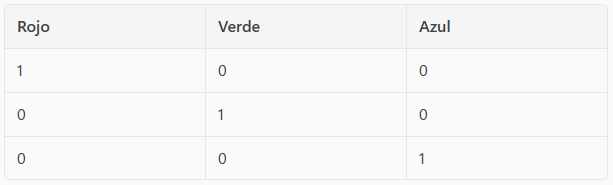

Se utiliza puesto que:
- los modelos no pueden trabajar con texto.
- Además, si pusieramos una categoría con números (por ejemplo, decidir que rojo es 1, verde 2 y azul 3), el modelo podría sacar conclusiones de orden, es decir, pensar que 3 (azul) es mejor que 1 (rojo).

In [ ]:
# Identificación de columnas categóricas (tipo 'object')
categorical_columns = scaled_data.select_dtypes(include=['object']).columns.tolist()

# Se excluye la columna objetivo 'NObeyesdad' para no codificarla
categorical_columns.remove('NObeyesdad')

# Aplicación de codificación one-hot a las columnas categóricas
# sparse_output=False devuelve un array denso (útil para convertir en DataFrame)
# drop='first' elimina la primera categoría para evitar multicolinealidad
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(scaled_data[categorical_columns])

# Conversión del resultado codificado en un DataFrame con nombres de columnas generados automáticamente
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

# Combinación del DataFrame original (sin las columnas categóricas) con el nuevo DataFrame codificado
prepped_data = pd.concat([scaled_data.drop(columns=categorical_columns), encoded_df], axis=1)

Todas las variables categóricas han sido transformadas en características codificadas con one-hot. Esto aumenta el número total de campos a 24.


### Codifica la variable objetivo


In [ ]:
# Codificación de la variable objetivo 'NObeyesdad'

# Convierte la columna 'NObeyesdad' en tipo categórico y luego la codifica como números enteros
# Cada categoría (nivel de obesidad) se transforma en un número único
prepped_data['NObeyesdad'] = prepped_data['NObeyesdad'].astype('category').cat.codes

# Muestra las primeras 5 filas del conjunto de datos ya preparado
prepped_data.head()

,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### Separar los datos (variables dependientes por un lado, independiente por otro)


In [ ]:
# Preparación del conjunto de datos final para el modelo

# X contiene todas las columnas excepto la variable objetivo 'NObeyesdad'
# Estas son las características (features) que se usarán para entrenar el modelo
X = prepped_data.drop('NObeyesdad', axis=1)

# y contiene únicamente la variable objetivo 'NObeyesdad'
# Esta es la etiqueta (target) que el modelo intentará predecir
y = prepped_data['NObeyesdad']

## Entrenamiento del modelo y evaluación del mismo


### Partir el dataset
Dividir el dataset en entrenamiento (train) y prueba (test)


In [ ]:
# División del conjunto de datos en entrenamiento y prueba

# train_test_split divide los datos en dos partes:
# - X_train e y_train se usarán para entrenar el modelo
# - X_test e y_test se usarán para evaluar el modelo

# test_size=0.2 indica que el 20% de los datos se usarán para prueba y el 80% para entrenamiento

# random_state=42 asegura que la división sea reproducible (si ejecutas el código otra vez, obtendrás la misma división)

# stratify=y garantiza que la proporción de clases en y se mantenga igual en los conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Regresión Logística o One-vs-All

En el enfoque One-vs-All:

One-vs-All (Uno contra todos) es una estrategia para adaptar algoritmos de clasificación binaria (que solo distinguen entre dos clases) a problemas con múltiples clases.

En lugar de entrenar un solo modelo para distinguir entre las tres, el enfoque One-vs-All crea un modelo por clase:

Modelo A: aprende a distinguir entre “Clase A” y “no Clase A”.
Modelo B: De los clasificados en "no clase A", distingue entre “Clase B” y “no Clase B”.
Modelo C: De los clasificados en "no clase B", distingue entre “Clase C” y “no Clase C”.

- ¿Qué pasa al predecir?
Cuando llega un nuevo dato, cada modelo da una probabilidad de que ese dato pertenezca a su clase.
Se elige la clase con la mayor probabilidad como la predicción final.

#### Ventajas:
- Es más simple y eficiente en cuanto al número de clasificadores (k).
- Es más fácil de implementar en algoritmos que ya proporcionan probabilidades (puntuaciones de confianza). Por ejemplo: regresión logística o SVM.

#### Desventajas:
- Puede haber desequilibrio: cada modelo compara una clase contra todas las demás, que suelen tener más ejemplos.
- Si los datos están muy desbalanceados, el modelo puede tener dificultades para aprender correctamente.

Entrena un modelo de regresión logística utilizando la estrategia Uno-contra-Todos y evalúa su rendimiento.


In [ ]:
# Entrenamiento de un modelo de regresión logística utilizando la estrategia Uno-contra-Todos (por defecto)
model_ova = LogisticRegression(multi_class='ovr', max_iter=1000)  # Se crea el modelo con la estrategia 'ovr' (One-vs-Rest) y se establece un máximo de 1000 iteraciones para asegurar la convergencia
model_ova.fit(X_train, y_train)  # Se entrena el modelo con los datos de entrenamiento (X_train como características y y_train como etiquetas)

LogisticRegression(max_iter=1000, multi_class='ovr')

Ahora, evaluamos la precisión del modelo entrenado para medir lo bien que se desempeña al hacer predicciones sobre datos de prueba que no ha visto antes.


In [ ]:
# Predicciones
y_pred_ova = model_ova.predict(X_test)  # El modelo entrenado realiza predicciones sobre los datos de prueba

# Métricas de evaluación para la estrategia Uno-contra-Todos (OvA)
print("Estrategia Uno-contra-Todos (OvA)")  # Se indica qué estrategia se está evaluando
print(f"Precisión: {np.round(100*accuracy_score(y_test, y_pred_ova), 2)}%")  # Se calcula y muestra la precisión del modelo como porcentaje, redondeada a dos decimales

Estrategia Uno-contra-Todos (OvA)
Precisión: 76.12%


### En el enfoque Uno-contra-Uno:

* El algoritmo entrena un clasificador binario para cada par de clases del conjunto de datos.
* Si hay k clases, se generan $k(k-1)/2$ clasificadores.
* Cada clasificador se entrena para distinguir entre dos clases específicas, ignorando las demás.
* Durante la predicción, se utilizan todos los clasificadores y se aplica un mecanismo de "votación" para decidir la clase final, seleccionando aquella que gana en la mayoría de las comparaciones por pares.

#### Ventajas:
* Es adecuado para algoritmos que requieren mucho tiempo de entrenamiento con grandes volúmenes de datos, ya que cada clasificador binario trabaja con un subconjunto más pequeño (solo muestras de dos clases).
* En algunos casos puede ofrecer mayor precisión, ya que cada clasificador se centra exclusivamente en diferenciar dos clases concretas.

#### Desventajas:
* Es computacionalmente costoso en conjuntos de datos con muchas clases, debido al elevado número de clasificadores necesarios.
* Puede generar predicciones ambiguas si el resultado de la votación termina en empate.


Entrena un modelo de regresión logística utilizando la estrategia Uno-contra-Uno (OvO) y evalúa lo bien que se desempeña.


In [ ]:

# Entrenamiento de un modelo de regresión logística utilizando la estrategia Uno-contra-Uno
model_ovo = OneVsOneClassifier(LogisticRegression(max_iter=1000))  # Se crea un clasificador OvO que entrena múltiples modelos de regresión logística, uno para cada par de clases. Se establece un máximo de 1000 iteraciones para asegurar la convergencia.
model_ovo.fit(X_train, y_train)  # Se entrena el modelo OvO con los datos de entrenamiento (X_train como características y y_train como etiquetas)


OneVsOneClassifier(estimator=LogisticRegression(max_iter=1000))

Evalúa la precisión del modelo entrenado como una medida de lo bien que se desempeña al hacer predicciones sobre datos de prueba no vistos.

In [ ]:
# Predicciones
y_pred_ovo = model_ovo.predict(X_test)  # El modelo OvO realiza predicciones sobre los datos de prueba

# Métricas de evaluación para la estrategia OvO
print("Estrategia Uno-contra-Uno (OvO)")  # Se indica qué estrategia se está evaluando
print(f"Precisión: {np.round(100*accuracy_score(y_test, y_pred_ovo), 2)}%")  # Se calcula y muestra la precisión del modelo como porcentaje, redondeada a dos decimales

Estrategia Uno-contra-Uno (OvO)
Precisión: 92.2%


### "Experimenta con distintos tamaños de prueba en train_test_split (por ejemplo, 0.1, 0.3) y observa el impacto en lo bien que se desempeña el modelo.


In [ ]:

# Se prueba el modelo con distintos tamaños de conjunto de prueba
for test_size in [0.1, 0.3]:  # Se iteran dos valores: 0.1 y 0.3, que representan el 10% y el 30% del total de datos para pruebas
    # División del conjunto de datos en entrenamiento y prueba, manteniendo la proporción de clases (stratify=y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

    # Entrenamiento del modelo OvA con el conjunto de entrenamiento
    model_ova.fit(X_train, y_train)

    # Predicción sobre el conjunto de prueba
    y_pred = model_ova.predict(X_test)

    # Se muestra el tamaño del conjunto de prueba utilizado
    print(f"Tamaño del conjunto de prueba: {test_size}")

    # Se calcula y muestra la precisión del modelo para ese tamaño de prueba
    print("Precisión:", accuracy_score(y_test, y_pred))


Tamaño del conjunto de prueba: 0.1
Precisión: 0.7594339622641509
Tamaño del conjunto de prueba: 0.3
Precisión: 0.749211356466877


### Representa un gráfico de barras con la importancia de las características utilizando los coeficientes del modelo de regresión logística entrenado con la estrategia Uno-contra-Todos. Prueba también con el modelo Uno-contra-Uno.


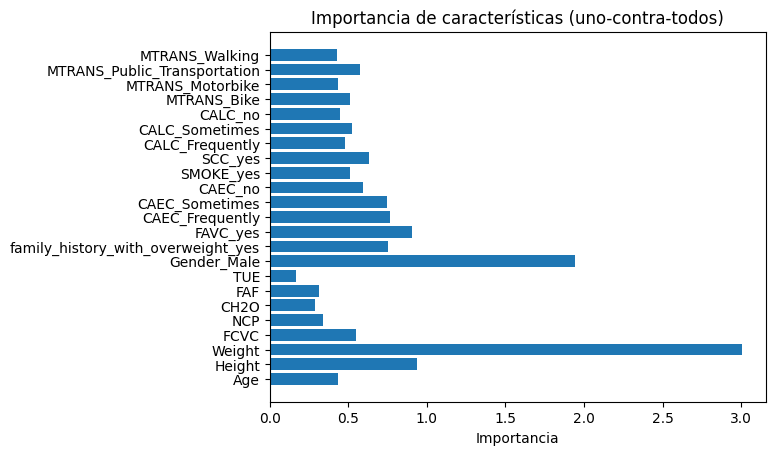

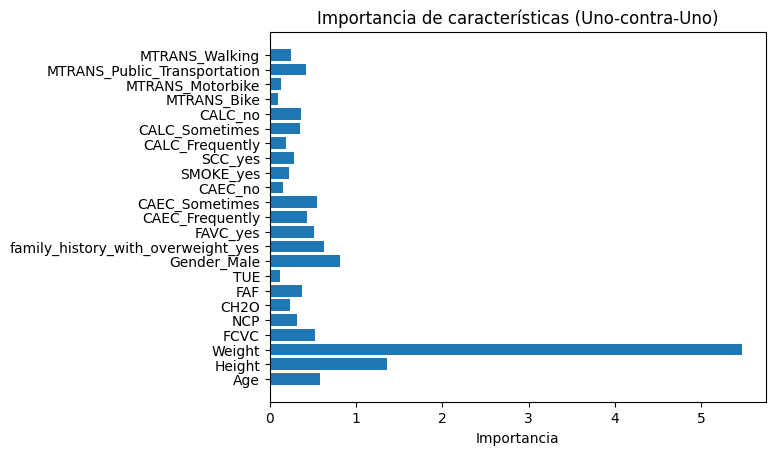

In [ ]:

# Importancia de características con el modelo Uno-contra-Todos (OvA)
feature_importance = np.mean(np.abs(model_ova.coef_), axis=0)  # Se calcula la importancia promedio de cada característica tomando el valor absoluto de los coeficientes y promediando entre todas las clases
plt.barh(X.columns, feature_importance)  # Se crea un gráfico de barras horizontal con los nombres de las características
plt.title("Importancia de características (uno-contra-todos)")  # Título del gráfico
plt.xlabel("Importancia")  # Etiqueta del eje X
plt.show()  # Se muestra el gráfico

# Importancia de características con el modelo Uno-contra-Uno (OvO)
# Se recopilan todos los coeficientes de los clasificadores binarios subyacentes
coefs = np.array([est.coef_[0] for est in model_ovo.estimators_])  # Se extraen los coeficientes de cada clasificador binario del modelo OvO

# Se calcula la importancia promedio de cada característica en todos los clasificadores
feature_importance = np.mean(np.abs(coefs), axis=0)  # Se toma el valor absoluto de los coeficientes y se promedia

# Se representa la importancia de las características en un gráfico de barras horizontal
plt.barh(X.columns, feature_importance)  # Se crea el gráfico con los nombres de las características
plt.title("Importancia de características (Uno-contra-Uno)")  # Título del gráfico
plt.xlabel("Importancia")  # Etiqueta del eje X
plt.show()  # Se muestra el gráfico


Los resultados son distintos porque los dos gráficos representan la importancia de las características según dos estrategias de clasificación diferentes:

* Uno-contra-Todos (OvA)

Cada clase se compara contra todas las demás. Esto puede hacer que el modelo se enfoque en características que ayudan a distinguir una clase específica del resto.

En el gráfico, "Weight" y "Height" tienen una gran importancia, lo que indica que son muy útiles para diferenciar entre una clase y el resto.
* Uno-contra-Uno (OvO)

Cada par de clases se compara por separado. Esto permite que el modelo se enfoque en diferencias más específicas entre dos clases a la vez.

Aunque "Weight" y "Height" siguen siendo importantes, los valores cambian porque cada clasificador binario puede valorar las características de forma distinta según el par de clases que compara.

¿Por qué varían los valores?
* Método de cálculo: En OvA se promedian los coeficientes de varios modelos que comparan una clase contra todas. En OvO se promedian los coeficientes de muchos modelos que comparan pares de clases.

* Sensibilidad del modelo: OvO puede captar matices entre clases similares que OvA podría pasar por alto.

* Distribución de datos: Cada estrategia utiliza subconjuntos distintos del conjunto de datos para entrenar sus clasificadores.

### Escribe una función llamada pipeline_riesgo_obesidad para automatizar todo el proceso: <br>
<ol>
<li> Cargar y preprocesar los datos </li>
<li> Entrenar el modelo </li>
<li> Evaluar el modelo </li>
</ol>
La función debe aceptar como argumentos de entrada la ruta del archivo y el tamaño del conjunto de prueba.


In [ ]:
""" pipeline_riesgo_obesidad automatiza todo el proceso de análisis y modelado para predecir el riesgo
de obesidad a partir de un conjunto de datos."""
# Definición de la función pipeline_riesgo_obesidad
def pipeline_riesgo_obesidad(data_path, test_size=0.2):
    # Cargar los datos desde el archivo CSV
    data = pd.read_csv(data_path)

    # Estandarización de las características numéricas continuas
    continuous_columns = data.select_dtypes(include=['float64']).columns.tolist()  # Se identifican las columnas numéricas continuas
    scaler = StandardScaler()  # Se crea un objeto para escalar los datos
    scaled_features = scaler.fit_transform(data[continuous_columns])  # Se ajusta y transforma los datos numéricos

    # Conversión de los datos escalados a un DataFrame
    scaled_df = pd.DataFrame(scaled_features, columns=scaler.get_feature_names_out(continuous_columns))

    # Combinación de los datos escalados con el resto del conjunto original
    scaled_data = pd.concat([data.drop(columns=continuous_columns), scaled_df], axis=1)

    # Identificación de columnas categóricas
    categorical_columns = scaled_data.select_dtypes(include=['object']).columns.tolist()
    categorical_columns.remove('NObeyesdad')  # Se excluye la columna objetivo

    # Codificación one-hot de las variables categóricas
    encoder = OneHotEncoder(sparse_output=False, drop='first')  # Se crea el codificador, eliminando la primera categoría para evitar multicolinealidad
    encoded_features = encoder.fit_transform(scaled_data[categorical_columns])  # Se ajusta y transforma

    # Conversión de los datos codificados a un DataFrame
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

    # Combinación de los datos codificados con el resto del conjunto
    prepped_data = pd.concat([scaled_data.drop(columns=categorical_columns), encoded_df], axis=1)

    # Codificación de la variable objetivo
    prepped_data['NObeyesdad'] = prepped_data['NObeyesdad'].astype('category').cat.codes  # Se convierte a códigos numéricos

    # Preparación del conjunto final de datos
    X = prepped_data.drop('NObeyesdad', axis=1)  # Características
    y = prepped_data['NObeyesdad']  # Etiquetas

    # División del conjunto en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

    # Entrenamiento y evaluación del modelo
    model = LogisticRegression(multi_class='multinomial', max_iter=1000)  # Se crea el modelo de regresión logística
    model.fit(X_train, y_train)  # Se entrena el modelo
    y_pred = model.predict(X_test)  # Se hacen predicciones
    print("Precisión:", accuracy_score(y_test, y_pred))  # Se muestra la precisión del modelo

# Llamada a la función con la ruta del archivo y el tamaño del conjunto de prueba
pipeline_riesgo_obesidad(file_path, test_size=0.2)


Precisión: 0.8794326241134752
